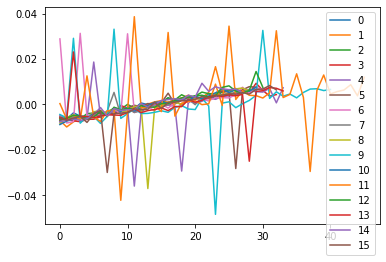

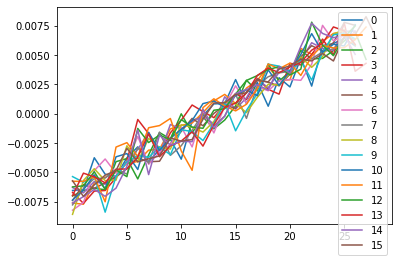

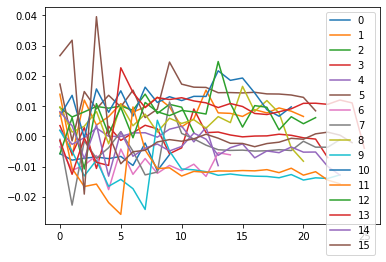

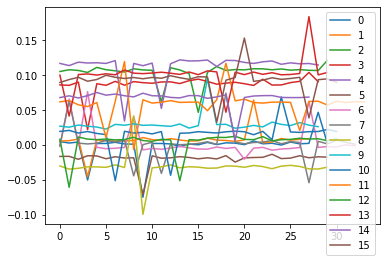

In [21]:
import matplotlib.pyplot as plt

laser_id_to_angle = {
    0: -15,
    1: 1,
    2: -13,
    3: 3,
    4: -11,
    5: 5,
    6: -9,
    7: 7,
    8: -7,
    9: 9,
    10: -5,
    11: 11,
    12: -3,
    13: 13,
    14: -1,
    15: 15
}
laser_angle_to_id = {y:x for x,y in laser_id_to_angle.items()}
sorted_angles_asc = sorted(laser_angle_to_id.keys())
sorted_ids_by_angle = [laser_angle_to_id[angle] for angle in sorted_angles_asc]


def plot_centroid_distances(filename):
    distances = [[] for _ in range(16)]
    current_id = -1
    # the centroid distances in this file should be sorted by the centroids z-coordinate
    with open(filename) as f:
        for line in f:
            if line.startswith("Laser id"):
                current_id = current_id + 1
            else:
                distances[current_id].append(float(line.rstrip("\n")))

    # try sorting by the angle
    for dist in distances:
        plt.plot(dist[1:])
    plt.legend(range(16))
    plt.show()

plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/centroid_distances.txt")
# plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/centroids_sample_new006.txt")
plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/centroids_sample_new005.txt")
# plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/centroids_sample_new004.txt")
# plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/centroids_sample_new007.txt")

plot_centroid_distances("/home/brano/Projects/github_indoor++/pcds/error_measurements/5m_2/fragments/fragment_0/centroid_distances_wall.txt")

plot_centroid_distances("/home/brano/Projects/thesis/virtual_error_measurements/5m_various_errors_comparison/centroids_default.txt")
